#Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

#Importing the Dataset & Lbeling them

In [ ]:
img1 = cv2.imread('/content/drive/MyDrive/Dataset_all/abe01.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (280, 56))
img1 = cv2.GaussianBlur(img1, (5, 5), 1)

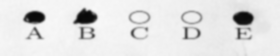

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)

In [ ]:
X = []
y = []

class_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'X':5}
num_classes = len(class_map) -1

folder_path = '/content/drive/MyDrive/Dataset_all/'

for file in os.listdir(folder_path):
    if file.endswith('.jpg'):
        label_chars = file[:5].upper()
        label_vector = [0] * num_classes

        if file.lower().startswith('x'):
            pass
        else:
            for char in file.upper():
                if char in class_map:
                    label_vector[class_map[char]] = 1

        img = cv2.imread(os.path.join(folder_path, file))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (280, 56))
        img = cv2.GaussianBlur(img, (5, 5), 1)
        img = img / 255.0

        X.append(img.reshape(56, 280, 1))
        y.append(label_vector)

X = np.array(X)
y = np.array(y)


In [ ]:
len(y)

268

In [ ]:
print(y)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 ...
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 0 0]]


#Splitting the datset into training set & test set

In [ ]:
# x_train = X[:50]
# x_test = X[50:]
# y_train = y[:50]
# y_test = y[50:]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#Building the CNN model

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(280, 56, 1)),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.sigmoid)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Training the model

In [ ]:
model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 695ms/step - accuracy: 0.1602 - loss: 0.7940 - val_accuracy: 0.2593 - val_loss: 0.6795
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 756ms/step - accuracy: 0.2978 - loss: 0.6768 - val_accuracy: 0.5926 - val_loss: 0.6505
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 519ms/step - accuracy: 0.4748 - loss: 0.6198 - val_accuracy: 0.3333 - val_loss: 0.5396
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.5091 - loss: 0.4741 - val_accuracy: 0.6667 - val_loss: 0.3496
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 638ms/step - accuracy: 0.6605 - loss: 0.2657 - val_accuracy: 0.6296 - val_loss: 0.1413
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 652ms/step - accuracy: 0.5332 - loss: 0.1168 - val_accuracy: 0.7778 - val_loss: 0.0661
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 504ms/step - accuracy: 0.6675 - loss: 0.0460 - val_accuracy: 0.7407 - val_loss: 0.0167
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 777ms/step - accuracy: 0.6027 - loss: 0.0201 - val_accuracy: 0.7407 - val_loss

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.7407 - loss: 0.0016


#predicting the test set result

In [ ]:
y_pred = model.predict(x_test)
# binary_preds = (y_pred > 0.6).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [ ]:
threshold = 0.5
predicted_labels = []
for i in range(len(y_pred)):
    multi_label = (y_pred[i] >= threshold).astype(int)
    predicted_labels.append(multi_label)

In [ ]:
print(y_test)

[[0 0 0 0 0]
 [0 1 1 1 0]
 [0 0 1 0 0]
 [0 0 0 0 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 0 0 0 1]
 [0 0 0 1 1]
 [0 1 0 0 0]
 [0 0 0 1 0]
 [0 1 0 1 0]
 [0 1 1 0 1]
 [0 0 1 0 1]
 [0 0 1 0 0]
 [0 1 0 0 1]
 [0 1 1 0 0]
 [1 1 0 1 1]
 [1 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 1 0]
 [0 0 1 0 0]
 [0 0 1 0 1]
 [1 0 1 1 1]
 [0 0 1 1 0]
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 0 1 0 1]]


In [ ]:
print(predicted_labels)

[array([0, 0, 0, 0, 0]), array([0, 1, 1, 1, 0]), array([0, 0, 1, 0, 0]), array([0, 0, 0, 0, 1]), array([1, 1, 1, 1, 1]), array([1, 1, 1, 1, 1]), array([1, 0, 0, 0, 1]), array([0, 0, 0, 1, 1]), array([0, 1, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 1, 0, 1, 0]), array([0, 1, 1, 0, 1]), array([0, 0, 1, 0, 1]), array([0, 0, 1, 0, 0]), array([0, 1, 0, 0, 1]), array([0, 1, 1, 0, 0]), array([1, 1, 0, 1, 1]), array([1, 0, 0, 0, 0]), array([0, 0, 0, 1, 0]), array([0, 0, 1, 1, 0]), array([0, 0, 1, 0, 0]), array([0, 0, 1, 0, 1]), array([1, 0, 1, 1, 1]), array([0, 0, 1, 1, 0]), array([0, 0, 0, 0, 1]), array([0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1])]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_labels)

1.0

#Saving the model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the trained model in Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model.save('/content/drive/MyDrive/omr_model.h5')